In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data/credit_score.csv')

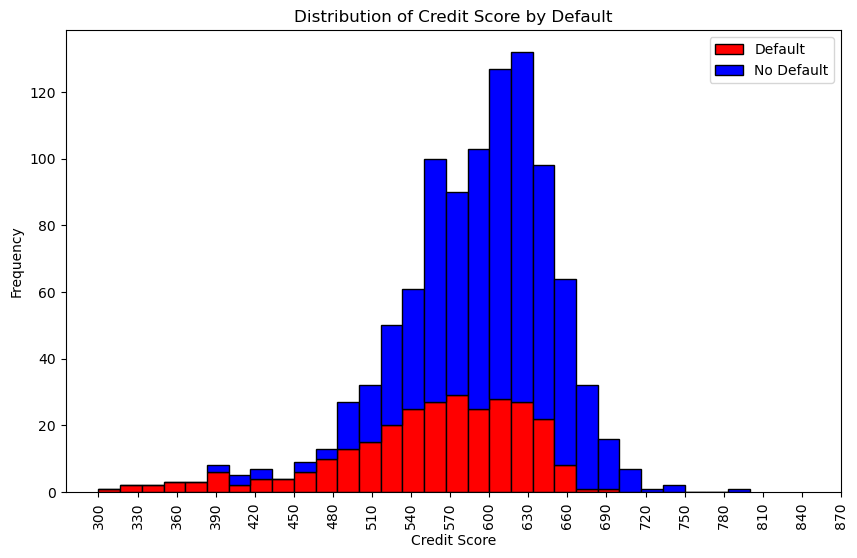

In [18]:
# Distribution of credit_score

df1 = data[data['DEFAULT'] == 1]
df2 = data[data['DEFAULT'] == 0]

plt.figure(figsize=(10, 6))

plt.hist([df1['CREDIT_SCORE'], df2['CREDIT_SCORE']], bins=30, stacked=True, color=['red', 'blue'], edgecolor='black',
         label=['Default', 'No Default'])

plt.title('Distribution of Credit Score by Default')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.legend()

plt.xticks(np.arange(300, 900, 30), rotation=90)

plt.show()


It seems to me that a division into 4 classes is ok:
very high credit score - 

In [19]:
import plotly.graph_objs as go
import numpy as np

def find_not_default_percentage(lower_bound):
    df = data[data['CREDIT_SCORE'] >= lower_bound]
    default_percentage = df['DEFAULT'].mean()
    return (1-default_percentage)*100

def get_graph_lower_bound():
    default_percentage = []

    i = 300
    while i < 800:
        default_percentage.append(find_not_default_percentage(i))
        i += 1

    x_values = np.arange(300, 800, 1)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_values, y=default_percentage, mode='lines', name='Percent of Default'))
    fig.update_layout(
        title='Percent of not Default for people with Credit Score >= x',
        xaxis=dict(title='x (Credit Score)'),
        yaxis=dict(title='Percent of not Default'),
        hovermode='closest'
    )
    fig.show()

get_graph_lower_bound()



In [20]:
import plotly.graph_objs as go
import numpy as np

def find_default_percentage(upper_bound):
    df = data[data['CREDIT_SCORE'] <= upper_bound]
    default_percentage = df['DEFAULT'].mean()
    return default_percentage*100

def get_graph_upper_bound():
    default_percentage = []

    i = 300
    while i < 800:
        default_percentage.append(find_default_percentage(i))
        i += 1

    x_values = np.arange(300, 800, 1)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x_values, y=default_percentage, mode='lines', name='Percent of Default'))
    fig.update_layout(
        title='Percent of Default for people with Credit Score <= x',
        xaxis=dict(title='x (Credit Score)'),
        yaxis=dict(title='Percent of Default'),
        hovermode='closest'
    )
    fig.show()

get_graph_upper_bound()



In [21]:
print(data[data['CREDIT_SCORE']<=384]['DEFAULT'].mean(), data[data['CREDIT_SCORE']<=384]['DEFAULT'].count())
print(data[(data['CREDIT_SCORE'] >= 384) & (data['CREDIT_SCORE'] <= 488)]['DEFAULT'].mean(), data[(data['CREDIT_SCORE'] >= 384) & (data['CREDIT_SCORE'] <= 488)]['DEFAULT'].count())
print(data[(data['CREDIT_SCORE'] >= 489) & (data['CREDIT_SCORE'] <= 531)]['DEFAULT'].mean(), data[(data['CREDIT_SCORE'] >= 489) & (data['CREDIT_SCORE'] <= 531)]['DEFAULT'].count())
print(data[(data['CREDIT_SCORE'] >= 532) & (data['CREDIT_SCORE'] <= 664)]['DEFAULT'].mean(), data[(data['CREDIT_SCORE'] >= 532) & (data['CREDIT_SCORE'] <= 664)]['DEFAULT'].count())
print(data[(data['CREDIT_SCORE'] >= 665) & (data['CREDIT_SCORE'] <= 800)]['DEFAULT'].mean(), data[(data['CREDIT_SCORE'] >= 665) & (data['CREDIT_SCORE'] <= 800)]['DEFAULT'].count())

1.0 11
0.7037037037037037 54
0.44680851063829785 94
0.24518613607188702 779
0.03225806451612903 62


It seems to me that here may be 5 classes:
<ul>
    <li>CREDIT_SCORE ≤ 384 - Extremely high risk of default</li>
    <li>385 < CREDIT_SCORE ≤ 488 - High risk of default</li>
    <li>489 < CREDIT_SCORE ≤ 531 - Moderate risk of default</li>
    <li>532 < CREDIT_SCORE ≤ 664 - Low risk of default</li>
    <li>665 < CREDIT_SCORE ≤ 800 - Extremely low risk of default</li>
</ul>



In [22]:
#creating new column RISK_CLASS
def risk_class(score):
    if score <= 384:
        return -2
    elif score <= 488:
        return -1
    elif score <= 531:
        return 0
    elif score <= 664:
        return 1
    else:
        return 2
    
data['RISK_CLASS'] = data['CREDIT_SCORE'].apply(risk_class)

In [23]:
data = data.drop('CREDIT_SCORE', axis=1)
data = data.drop('DEFAULT', axis=1)

In [24]:
data.to_csv('data/data_classes_version1.csv', index=False)